In [3]:
import numpy as np

# numpy is faster than pandas

In [4]:
heights = [60, 62, 65, 68, 70, 74]
weights = [140, 138, 150, 166, 190, 250]

In [5]:
# gives correlation matrix

np.corrcoef(heights, weights)

array([[1.        , 0.92989745],
       [0.92989745, 1.        ]])

In [6]:
# gives correlation matrix

np.corrcoef(heights, weights)[0][1]

0.9298974521408027

In [7]:
import pandas as pd

df = pd.read_csv('https://www.ishelp.info/data/insurance.csv')

In [8]:
df.head()

,age,sex,bmi,children,smoker,region,charges
0,19,female,27.900,0,yes,southwest,16884.92400
1,18,male,33.770,1,no,southeast,1725.55230
2,28,male,33.000,3,no,southeast,4449.46200
3,33,male,22.705,0,no,northwest,21984.47061
4,32,male,28.880,0,no,northwest,3866.85520


In [9]:
num_df = df.drop(['sex', 'smoker', 'region'], axis=1)

In [10]:
num_df.corr()

,age,bmi,children,charges
age,1.000000,0.109272,0.042469,0.299008
bmi,0.109272,1.000000,0.012759,0.198341
children,0.042469,0.012759,1.000000,0.067998
charges,0.299008,0.198341,0.067998,1.000000


In [11]:
df.charges.corr(df.bmi)

0.19834096883362895

In [12]:
from scipy import stats

In [13]:
stats.pearsonr(df.charges, df.age)

PearsonRResult(statistic=0.2990081933306476, pvalue=4.886693331718192e-29)

In [14]:
r, p = stats.pearsonr(df.charges, df.age)

In [15]:
print(round(r, 3))
print(round(p, 29))

# It is extremely likely that will see the correlation again
# It is small likelyhood that we will not see that again

0.299
5.0000000000000004e-29


In [16]:
corr_df = pd.DataFrame(columns=['r', 'p'])

corr_df

,r,p


In [17]:
for col in df:
  print(col)

  if pd.api.types.is_numeric_dtype(df[col]) and col != 'charges':
    r, p = stats.pearsonr(df.charges, df[col])
    corr_df.loc[col] = [round(r, 3), round(p, 3)]


corr_df

age
sex
bmi
children
smoker
region
charges


,r,p
age,0.299,0.000
bmi,0.198,0.000
children,0.068,0.013


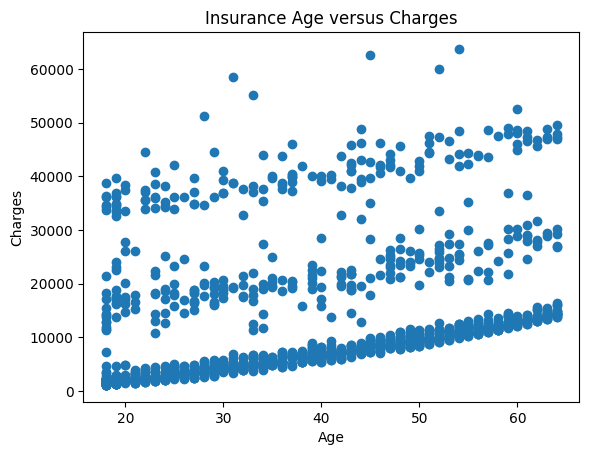

In [18]:
import matplotlib.pyplot as plt

plt.scatter(df.age, df.charges)
plt.title('Insurance Age versus Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

In [19]:
df_smoker = df[df['smoker'] == 'yes']
df_nonsmoker = df[df['smoker'] == 'no']

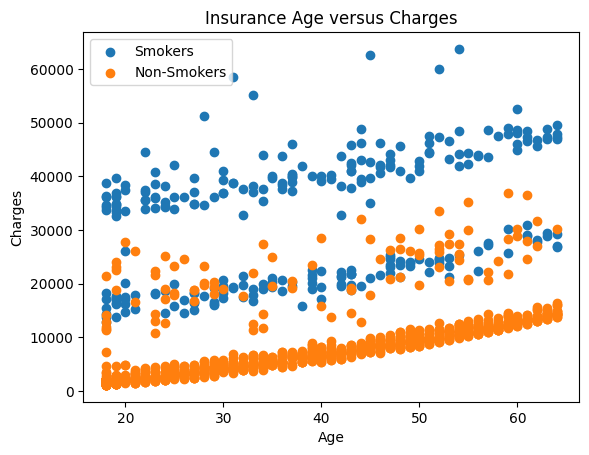

In [20]:
plt.scatter(df_smoker.age, df_smoker.charges, label='Smokers')
plt.scatter(df_nonsmoker.age, df_nonsmoker.charges, label='Non-Smokers')
plt.title('Insurance Age versus Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

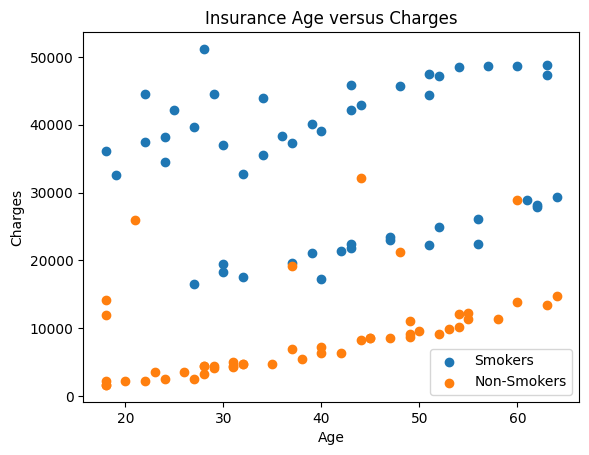

In [21]:
df_smoker_reduced = df_smoker.sample(50)
df_nonsmoker_reduced = df_nonsmoker.sample(50)

plt.scatter(df_smoker_reduced.age, df_smoker_reduced.charges, label='Smokers')
plt.scatter(df_nonsmoker_reduced.age, df_nonsmoker_reduced.charges, label='Non-Smokers')
plt.title('Insurance Age versus Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.legend()
plt.show()

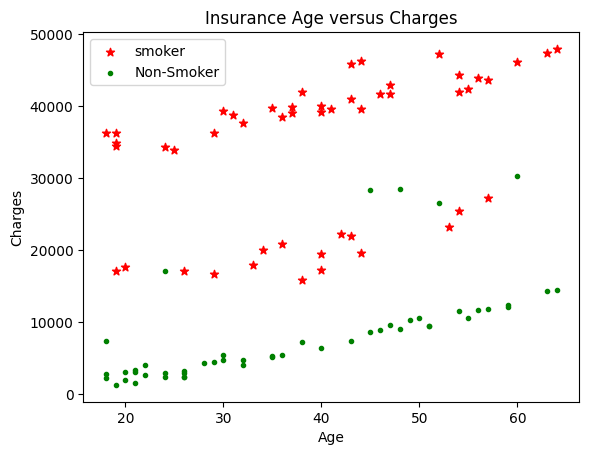

In [24]:
df_smoker_reduced = df_smoker.sample(50)
df_nonsmoker_reduced = df_nonsmoker.sample(50)

plt.scatter(df_smoker_reduced.age, df_smoker_reduced.charges, label="smoker", color='red', marker='*')
plt.scatter(df_nonsmoker_reduced.age, df_nonsmoker_reduced.charges, label="Non-Smoker", color='green', marker='.')
plt.title("Insurance Age versus Charges")
plt.xlabel("Age")
plt.ylabel("Charges")
plt.legend()
plt.show()

LinregressResult(slope=257.7226186668954, intercept=3165.8850060630302, rvalue=0.2990081933306476, pvalue=4.886693331718841e-29, stderr=22.502389286770295, intercept_stderr=937.1494650703766)


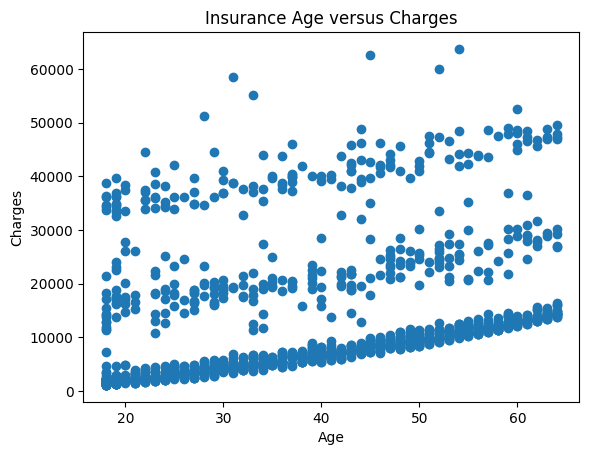

In [26]:
from scipy import stats

print(stats.linregress(df.age, df.charges))

# y = mx + b
# y = slope(x) + intercept

plt.scatter(df.age, df.charges)
plt.title('Insurance Age versus Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

Stderr tells how spread are the data points around the liner regression line

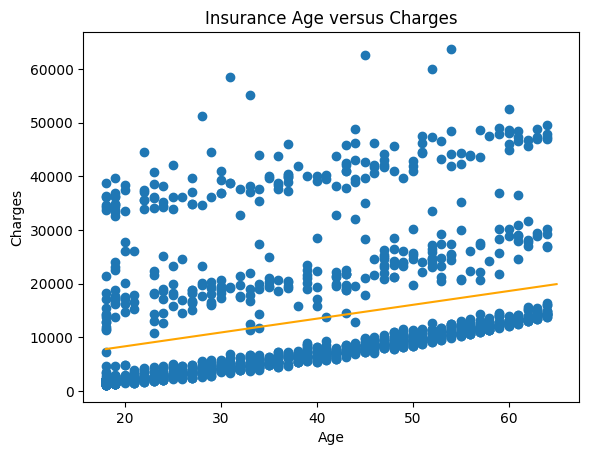

In [35]:
# y = mx + b
# y = slope(x) + intercept

m ,b, r, p, err = stats.linregress(df.age, df.charges)


x = range(18, df.age.max() + 2)
y = m * x + b
plt.plot(x, y, color='orange')
plt.scatter(df.age, df.charges)
plt.title('Insurance Age versus Charges')
plt.xlabel('Age')
plt.ylabel('Charges')
plt.show()

Interpretation on linear regression line - older the people, more the insurance charges

In [38]:
## Calculating heteroscadasticity (hetero means "diff", scadasticity means "spread")

# if heteroscadasticity is more, then it means spread is more around the linear regression line, which implies that are predictions are not very accurate
# if heteroscadasticity is less, then it means spread is less around the linear regression line, which implies that are predictions are more accurate

from statsmodels.stats.diagnostic import het_breuschpagan
from statsmodels.stats.diagnostic import het_white
from statsmodels.formula.api import ols


# ols -> Ordinary Least Squares
model = ols(formula='charges~age', data=df).fit() # charges -> y, age -> x

white_test = het_white(model.resid, model.model.exog) # exog means independent variables
breuschpagan_test = het_breuschpagan(model.resid, model.model.exog) # exog means independent variables

output_df = pd.DataFrame(columns=['LM stat', 'LM p', 'F stat', 'F stat p'])
output_df.loc['white'] = white_test
output_df.loc['Breusch-Pagan'] = breuschpagan_test

output_df

# low p value tells how likely you will not see the stats again
# also, p value tells how much you can trust that the value will appear again in future data collections

,LM stat,LM p,F stat,F stat p
white,0.002713,0.998645,0.001353,0.998648
Breusch-Pagan,0.000413,0.983776,0.000413,0.983792


Interpretation - low value of LM stat and F stat means that there is low heretoscadasticity